#**EXECUTIVE SUMMARY**#

**Project Overview:**

The objective of the project is to develop machine learning models to analyze and predict the 'is_bound' of unseen data using logistic regression and Naive Bayes models. Cooperators dataset has been provided for a particular year.  The project's core involved data pre-processing, model training, model tuning and visualization of output using  Receiver Operating Characteristic (ROC) curve and final predictions.
 <br><br>

**A. Data Pre-Processing:** For this, we did feature engineering and created a new feature `vehicle_age`. Then we plotted a histogram for targetted class. Further we handled missing values like `Vehicle_ownership` , `Vehicle_value` , `Commute_distance` , `Years_licensed` , `Gender` , `Annual_km` , `Occupation`. For categorical features we performed One-hot encoding. Finally we splitted the data into Training dataset and Test dataset.


**B. Model Training:** In the initial stage, we split the existing training dataset into Training and Validation dataset to validate the predications. Furthermore, there are multiple types of Naive Bayes Model among which we worked on the few like 'Complement NB', 'Bernoulli NB', ;'Gaussian NB'. Then at last, we performed Logistic regression to train the model.


**C. Model Tunning:** Additionally, we tunned the model. We set the list of thresholds for models, we created a function to predict the probabilities using the threshold set. Then we created a function for metrics calculations. We created a pandas dataframe to store the metrics for each threshold. This dataframe was used to plot curve for metrics which the idea for ideal threshold. The model which had the best revenue generation was Gaussian Naive Bayes Modal with:

* Accuracy = 57%
* False negative rate = 41%
* False positive rate = 42%  
* Advertising revenue = 13 cents per person


**D. Vizualization of Output:** For this stage, we used the function for ROC plot as learned in the class and plotted ROC Curve for Logistics Regression modal and Guassian Naive Bayes model.

Further, The Area Under the Curve (AUC) was calculated for both models:

* Logistic Regression Model: 0.5
* Gaussian Naive Bayes Model: 0.62

Comparison - We concluded that Gaussion modal has better AUC values.

**E. Final Results:**

Result for Gaussian -   
* Accuracy = 57%
* False negative rate = 41%
* False positive rate = 42%  
* Advertising revenue = 13 cents per person

Result for Logistic Regression -   
* Accuracy = 40%
* False negative rate = 33%
* False positive rate = 65%  
* Advertising revenue = 1 cent per person





## **DATA PRE-PROCESSING**
Data preprocessing is cleaning, transforming and combining the raw data to make it ready for analysis and predictions. The main objective is to improve the quality of data and to make it more convenient for data mining.
The most common steps which are performed during data preprocessing are:
* Data Cleaning
* Data Reduction
* Handling Missing Data
* Feature Engineering


Therefore, the flow which we followed in data pre-processing is:
* Imported the libraries
* Loaded the data sets
* Fixed mismatched feature names
* Concatenated datasets
* Checked the unique labels
* Dropped unwanted columns
* Checked class imbalance of targer variable 'is_bound' through histogram
* Lastly, plotted horizontal bar graphs to get the fraction of missing values and later fixed imputed them.

Further, performed one-hot encoding, essentially the most important part for data pre-processing.
One-hot encoding : A technique that we use to represent categorical variables as numerical values in a machine learning model.

Finally, separated train and test datasets again.

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading train and test dataset
train_df = pd.read_csv('/Users/gunpreetsingh/Gunpreet/UofG/DATA6100/Cooperators_Quotes_Dataset_Training.csv',parse_dates=['QUOTEDATE'])
test_df = pd.read_csv('/Users/gunpreetsingh/Gunpreet/UofG/DATA6100/Cooperators_Quotes_Dataset_Test.csv',parse_dates=['QUOTEDATE'])

/var/folders/s0/q4xxpt713nlbq6s31tjl96cc0000gn/T/ipykernel_36185/1777240690.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/Users/gunpreetsingh/Gunpreet/UofG/DATA6100/Cooperators_Quotes_Dataset_Training.csv',parse_dates=['QUOTEDATE'])


In [ ]:
#Display first 5 rows of train dataset
train_df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT,IS_BOUND
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,10.0,No,Married,Trades,0,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,NaN,No,Married,Not Known,0,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,No,Single,Not Known,0,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,NaN,Yes,Single,Not Known,0,0,0,0,0,0


In [ ]:
#Display first 5 rows of test dataset
test_df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUALKM,COMMUTEDISTANCE,MARKINGSYSTEM,TRACKINGSYSTEM,VEHICLEOWNERSHIP,VEHICLEVALUE,...,YEARSLICENSED,YEARSASPRINCIPALDRIVER,MULTIPRODUCT,MARITALSTATUS,OCCUPATION,CONVICTIONCOUNTMINOR3YRS,CONVICTIONCOUNTMAJOR3YRS,CONVICTIONCOUNTCRIMINAL3YRS,ASSIGNEDLOSSESPD5YRS,SUSPENSIONCOUNT
0,2017-01-03,2002,HONDA,CIVIC EX 2DR COUPE [U.S. MODEL],10000,4.0,NaN,NaN,NaN,NaN,...,7.0,NaN,No,Single,Not Known,0,0,0,0,0
1,2017-01-04,2010,FORD TRUCK/VAN,F150 XLT SUPERCREW 4WD,10000,10.0,NaN,NaN,NaN,NaN,...,13.0,NaN,Yes,Single,Not Known,0,0,0,0,0
2,2017-01-04,2017,DODGE/RAM TRUCK/VAN,RAM 1500 REBEL CREW CAB 4WD,9000,3.0,NaN,NaN,Owned,72000.0,...,33.0,NaN,Yes,Single,Not Known,0,0,0,0,0
3,2017-01-04,2013,DODGE/RAM TRUCK/VAN,RAM 1500 SPORT CREW CAB 4WD,10000,10.0,NaN,NaN,NaN,55000.0,...,9.0,NaN,No,Single,Not Known,0,0,0,0,0
4,2017-01-04,2014,FORD,FOCUS SE 4DR,20000,10.0,NaN,NaN,NaN,NaN,...,4.0,NaN,No,Single,Student,0,0,0,0,0


In [ ]:
#Information about the columns in the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101891 entries, 0 to 101890
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   QUOTEDATE                       101891 non-null  datetime64[ns]
 1   VEHICLEYEAR                     101891 non-null  int64         
 2   VEHICLEMAKE                     101891 non-null  object        
 3   VEHICLEMODEL                    101891 non-null  object        
 4   ANNUAL_KM                       101890 non-null  float64       
 5   COMMUTE_DISTANCE                66478 non-null   float64       
 6   MARKING_SYSTEM                  25 non-null      object        
 7   TRACKING_SYSTEM                 4 non-null       object        
 8   VEHICLE_OWNERSHIP               25441 non-null   object        
 9   VEHICLE_VALUE                   37218 non-null   float64       
 10  VEHICLEUSE                      101891 non-null  object 

In [ ]:
#Information about the columns in the dataframe
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   QUOTEDATE                    15114 non-null  datetime64[ns]
 1   VEHICLEYEAR                  15114 non-null  int64         
 2   VEHICLEMAKE                  15114 non-null  object        
 3   VEHICLEMODEL                 15114 non-null  object        
 4   ANNUALKM                     15114 non-null  int64         
 5   COMMUTEDISTANCE              9923 non-null   float64       
 6   MARKINGSYSTEM                19 non-null     object        
 7   TRACKINGSYSTEM               2 non-null      object        
 8   VEHICLEOWNERSHIP             3614 non-null   object        
 9   VEHICLEVALUE                 4955 non-null   float64       
 10  VEHICLEUSE                   15114 non-null  object        
 11  GENDER                       15114 non-nu

In [ ]:
#Storing our target variable in another variable
y = train_df['IS_BOUND']
train_df = train_df.drop(['IS_BOUND'],axis=1)

**There were some mismatched column names in training dataset and test datasets so we stored those mismatched column names of test dataset into a dictionary and stored them likewise of training dataset.**


In [ ]:
#Storing the column mismatch in the dictionary
j=0
new_col = {}
for i in test_df.columns:
  if i!=train_df.columns[j]:
    new_col.update({i:train_df.columns[j]})
  j+=1


In [ ]:
new_col

{'ANNUALKM': 'ANNUAL_KM',
 'COMMUTEDISTANCE': 'COMMUTE_DISTANCE',
 'MARKINGSYSTEM': 'MARKING_SYSTEM',
 'TRACKINGSYSTEM': 'TRACKING_SYSTEM',
 'VEHICLEOWNERSHIP': 'VEHICLE_OWNERSHIP',
 'VEHICLEVALUE': 'VEHICLE_VALUE',
 'YEAROFBIRTH': 'YEAR_OF_BIRTH',
 'POSTALCODE': 'POSTAL_CODE',
 'AREACODE': 'AREA_CODE',
 'YEARSLICENSED': 'YEARS_LICENSED',
 'YEARSASPRINCIPALDRIVER': 'YEARS_AS_PRINCIPAL_DRIVER',
 'MULTIPRODUCT': 'MULTI_PRODUCT',
 'MARITALSTATUS': 'MARITAL_STATUS',
 'CONVICTIONCOUNTMINOR3YRS': 'CONVICTION_COUNT_MINOR_3YRS',
 'CONVICTIONCOUNTMAJOR3YRS': 'CONVICTION_COUNT_MAJOR_3YRS',
 'CONVICTIONCOUNTCRIMINAL3YRS': 'CONVICTION_COUNT_CRIMINAL_3YRS',
 'ASSIGNEDLOSSESPD5YRS': 'ASSIGNED_LOSSES_PD_5YRS',
 'SUSPENSIONCOUNT': 'SUSPENSION_COUNT'}

**Now used the dictionary to replace the mismatched column names by using 'rename' function.**

In [ ]:
#Fixing the column mismatach
test_df.rename(columns = new_col, inplace = True)

In [ ]:
test_df.columns

Index(['QUOTEDATE', 'VEHICLEYEAR', 'VEHICLEMAKE', 'VEHICLEMODEL', 'ANNUAL_KM',
       'COMMUTE_DISTANCE', 'MARKING_SYSTEM', 'TRACKING_SYSTEM',
       'VEHICLE_OWNERSHIP', 'VEHICLE_VALUE', 'VEHICLEUSE', 'GENDER',
       'YEAR_OF_BIRTH', 'POSTAL_CODE', 'AREA_CODE', 'YEARS_LICENSED',
       'YEARS_AS_PRINCIPAL_DRIVER', 'MULTI_PRODUCT', 'MARITAL_STATUS',
       'OCCUPATION', 'CONVICTION_COUNT_MINOR_3YRS',
       'CONVICTION_COUNT_MAJOR_3YRS', 'CONVICTION_COUNT_CRIMINAL_3YRS',
       'ASSIGNED_LOSSES_PD_5YRS', 'SUSPENSION_COUNT'],
      dtype='object')

In [ ]:
#Concatenate the train and test dataset for easier pre processing
df = pd.concat([train_df,test_df])

In [ ]:
df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,MARKING_SYSTEM,TRACKING_SYSTEM,VEHICLE_OWNERSHIP,VEHICLE_VALUE,...,YEARS_LICENSED,YEARS_AS_PRINCIPAL_DRIVER,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,NaN,NaN,Owned,3000.0,...,25.0,10.0,No,Married,Trades,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,NaN,NaN,Owned,1.0,...,10.0,NaN,No,Married,Not Known,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,NaN,NaN,...,39.0,NaN,No,Single,Not Known,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,NaN,NaN,...,3.0,NaN,Yes,Single,Not Known,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,NaN,NaN,...,2.0,NaN,Yes,Single,Not Known,0,0,0,0,0


In [ ]:
# List of categorical features
cat_feature=[]
for i in df.columns:
  if df[i].dtype=='object':
    cat_feature.append(i)
cat_feature

['VEHICLEMAKE',
 'VEHICLEMODEL',
 'MARKING_SYSTEM',
 'TRACKING_SYSTEM',
 'VEHICLE_OWNERSHIP',
 'VEHICLEUSE',
 'GENDER',
 'POSTAL_CODE',
 'AREA_CODE',
 'MULTI_PRODUCT',
 'MARITAL_STATUS',
 'OCCUPATION']

In [ ]:
#Categorical features with unique labels
for feat in cat_feature:
  print(f'{feat}:{df[feat].nunique()}')

VEHICLEMAKE:281
VEHICLEMODEL:6099
MARKING_SYSTEM:4
TRACKING_SYSTEM:4
VEHICLE_OWNERSHIP:3
VEHICLEUSE:11
GENDER:3
POSTAL_CODE:1179
AREA_CODE:214
MULTI_PRODUCT:2
MARITAL_STATUS:6
OCCUPATION:19


In [ ]:
#Dropping features that have a lot of missing values
df = df.drop(['MARKING_SYSTEM','TRACKING_SYSTEM','YEARS_AS_PRINCIPAL_DRIVER'],axis=1)

In [ ]:
df.head()

,QUOTEDATE,VEHICLEYEAR,VEHICLEMAKE,VEHICLEMODEL,ANNUAL_KM,COMMUTE_DISTANCE,VEHICLE_OWNERSHIP,VEHICLE_VALUE,VEHICLEUSE,GENDER,...,AREA_CODE,YEARS_LICENSED,MULTI_PRODUCT,MARITAL_STATUS,OCCUPATION,CONVICTION_COUNT_MINOR_3YRS,CONVICTION_COUNT_MAJOR_3YRS,CONVICTION_COUNT_CRIMINAL_3YRS,ASSIGNED_LOSSES_PD_5YRS,SUSPENSION_COUNT
0,2016-01-02,2006,VOLKSWAGEN,JETTA 2.5 4P,10000.0,NaN,Owned,3000.0,Pleasure,Male,...,514,25.0,No,Married,Trades,0,0,0,0,0
1,2016-01-02,2017,HYUNDAI,ELANTRA GL 4DR,20000.0,NaN,Owned,1.0,Business,Male,...,905,10.0,No,Married,Not Known,0,0,0,0,0
2,2016-01-02,2015,CHEVROLET TRUCK/VAN,SILVERADO 2500 HD LT CREW CAB 4WD,15000.0,NaN,NaN,NaN,Pleasure,Male,...,403,39.0,No,Single,Not Known,0,0,0,0,0
3,2016-01-02,2010,TOYOTA,COROLLA CE 4DR,20000.0,20.0,NaN,NaN,Commute,Male,...,289,3.0,Yes,Single,Not Known,0,0,0,0,0
4,2016-01-04,2013,HONDA,CIVIC LX 4DR,30000.0,30.0,NaN,NaN,Commute,Male,...,416,2.0,Yes,Single,Not Known,0,0,0,0,0


### **FEATURE ENGINEERING**
The process of selecting, extracting, and transforming the most relevant features from the available data to build more accurate and efficient machine learning models.

**We created a new feature named `VEHICLE_AGE` using `QUOTEDATE` and `VEHICLEYEAR` to know how old the vehicle is.**


In [ ]:
#Normalizing the 'QUOTEDATE' column
df['QUOTEDATE'] = pd.to_datetime(df['QUOTEDATE'], format='%Y-%m-%d').dt.normalize()

In [ ]:
#Creating a new feature
from datetime import date,datetime

df['VEHICLE_AGE'] = df['QUOTEDATE'].dt.year - df['VEHICLEYEAR']

df['VEHICLE_AGE']

0        10
1        -1
2         1
3         6
4         3
         ..
15109     5
15110     6
15111    10
15112     3
15113     0
Name: VEHICLE_AGE, Length: 117005, dtype: int64

**There were some discrepancies in the data where the `VEHICLE_AGE` was < 0 which is not possible. This could be because of collecting data erroneously.**

**To fix this issue, where ever there rows < 0 ; we imputed them with 0.**

In [ ]:
#Fixing rows which have values less than 0
for i in range(len(df['VEHICLE_AGE'])):
  if df['VEHICLE_AGE'].iloc[i]<0:
    df['VEHICLE_AGE'].iloc[i] = 0

/var/folders/s0/q4xxpt713nlbq6s31tjl96cc0000gn/T/ipykernel_36185/1747179143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VEHICLE_AGE'].iloc[i] = 0
/var/folders/s0/q4xxpt713nlbq6s31tjl96cc0000gn/T/ipykernel_36185/1747179143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['VEHICLE_AGE'].iloc[i] = 0
/var/folders/s0/q4xxpt713nlbq6s31tjl96cc0000gn/T/ipykernel_36185/1747179143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [ ]:
df['VEHICLE_AGE']

0        10
1         0
2         1
3         6
4         3
         ..
15109     5
15110     6
15111    10
15112     3
15113     0
Name: VEHICLE_AGE, Length: 117005, dtype: int64

### **PLOTTING TARGET CLASS**
We can see there is a class imbalance in the target variable.

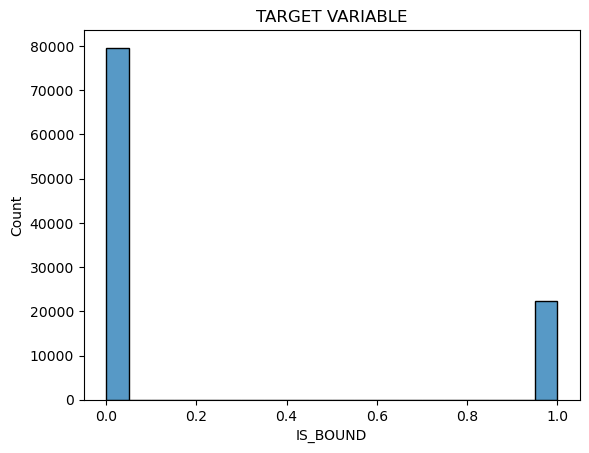

In [ ]:
plt.figure()
plt.title('TARGET VARIABLE')
sns.histplot(data=y, bins=20, kde=False)
plt.show()
plt.close()

### **HANDLING MISSING VALUES**
`Vehicle_ownership` , `Vehicle_value` , `Commute_distance` , `Years_licensed` , `Gender` , `Annual_km` , `Occupation` - these were the columns with missing value therefore we imputed them mean , median and mode methods.


**So as the represnt it visually , we plotted a horizontal bar graph to the fraction of missing values in the dataset.**

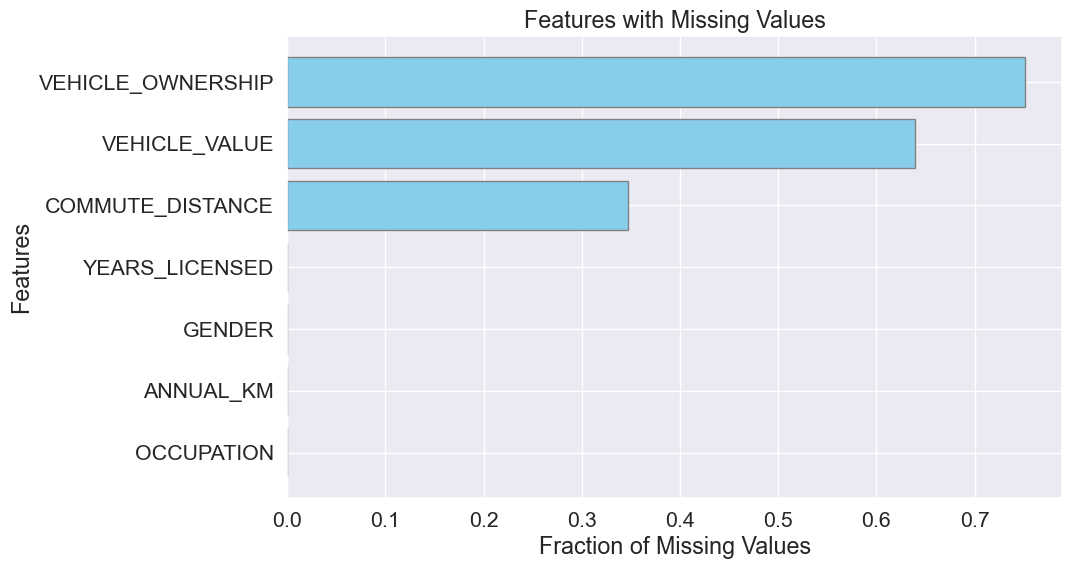

In [ ]:
feature_nan = df.isna().sum() / df.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
#We checked for label counts in the vehicle_ownership feature
df['VEHICLE_OWNERSHIP'].value_counts()

VEHICLE_OWNERSHIP
Owned        26240
Leased        2707
Non-owned      108
Name: count, dtype: int64

In [ ]:
#We imputed 'vehicle_ownership' with the 'Non-owned'
df['VEHICLE_OWNERSHIP'] = df['VEHICLE_OWNERSHIP'].fillna('Non-owned')


In [ ]:
#We imputed the missing values in 'vehicle_value' with mean of the dataset.
df['VEHICLE_VALUE'] = df['VEHICLE_VALUE'].fillna(df['VEHICLE_VALUE'].mean())

In [ ]:
#Imputing the missing values in 'commute_distance' with 0 rather than using mean
df['COMMUTE_DISTANCE'] = df['COMMUTE_DISTANCE'].fillna(0)

In [ ]:
#Mode of the 'Years_liscensed'
df['YEARS_LICENSED'].mode()

0    3.0
Name: YEARS_LICENSED, dtype: float64

In [ ]:
#Imputing the missing values in 'Years_Liscensed' with the mode of the feature
df['YEARS_LICENSED']=df['YEARS_LICENSED'].fillna(3)

In [ ]:
df['GENDER'].value_counts()

GENDER
Male       65605
Female     51394
Unknown        1
Name: count, dtype: int64

In [ ]:
#Imputing missing value with 'Unknown' to handle the imbalance in the 'gender' feature
df['GENDER'] =df['GENDER'].fillna('Unknown')

In [ ]:
#Imputing missing values in the 'Annual_km' with the mean of the 'annual_km' feature
df['ANNUAL_KM'] = df['ANNUAL_KM'].fillna(df['ANNUAL_KM'].mean())

In [ ]:
df['ANNUAL_KM'].count()

117005

In [ ]:
#Label counts of the 'occupation' feature
df['OCCUPATION'].value_counts()

OCCUPATION
Not Known                    105419
Professional/Other             1709
Trades                         1631
Retired                        1416
Labour/Plant                   1281
Office/Stores                  1134
Student                         742
Service Work                    726
Management/Administration       592
Homemaker                       586
Sales                           427
Professional/Health             285
Farm/Fisher                     271
Unemployed                      213
Government                      188
Professional/Social             156
Military                        129
Insurance                        92
Tradesman                         7
Name: count, dtype: int64

In [ ]:
#Imputing the missing values in the 'occupation' feature with the mode.
df['OCCUPATION'] = df['OCCUPATION'].fillna('Not Known')

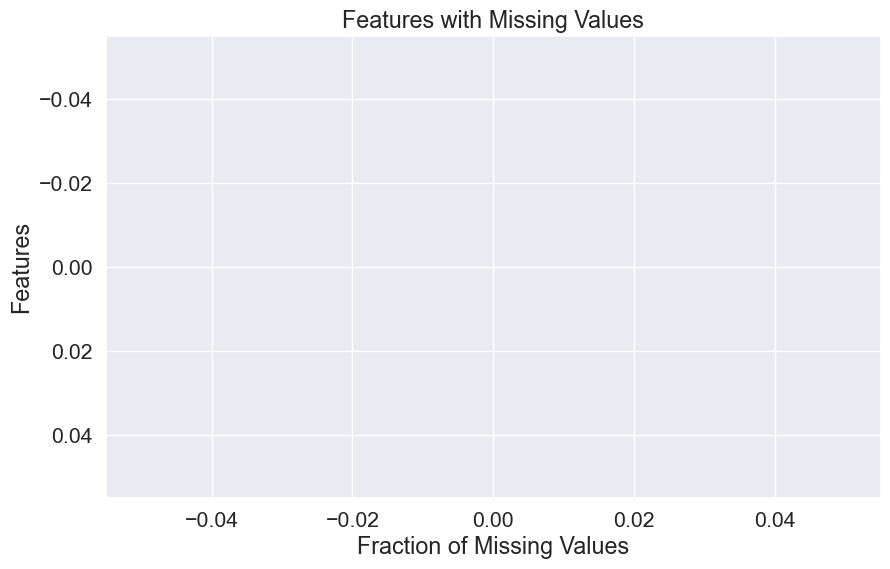

In [ ]:
#Final check of the missing values for further pre-processing and model training
feature_nan = df.isna().sum() / df.shape[0]
feature_nan = feature_nan[feature_nan > 0.0]
feature_nan = feature_nan.sort_values(ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.4)

# Create a horizontal bar plot
plt.barh(feature_nan.index, feature_nan.values, color='skyblue', edgecolor='gray')

# Add labels and a title
plt.xlabel("Fraction of Missing Values")
plt.ylabel("Features")
plt.title("Features with Missing Values")
plt.gca().invert_yaxis()
plt.show()

**Dropping `QUOTEDATE` feature as we have created a new feature called `VEHICLE_AGE`, there isn't need for it. The number of dimensions of `QUOTEDATE` are significantly high causing longer computational times.**

In [ ]:
df['QUOTEDATE'] = df['QUOTEDATE'].astype('object')

In [ ]:
df.nunique()

QUOTEDATE                          398
VEHICLEYEAR                         74
VEHICLEMAKE                        281
VEHICLEMODEL                      6099
ANNUAL_KM                          249
COMMUTE_DISTANCE                   163
VEHICLE_OWNERSHIP                    3
VEHICLE_VALUE                     2515
VEHICLEUSE                          11
GENDER                               3
YEAR_OF_BIRTH                       87
POSTAL_CODE                       1179
AREA_CODE                          214
YEARS_LICENSED                      89
MULTI_PRODUCT                        2
MARITAL_STATUS                       6
OCCUPATION                          19
CONVICTION_COUNT_MINOR_3YRS         13
CONVICTION_COUNT_MAJOR_3YRS          5
CONVICTION_COUNT_CRIMINAL_3YRS       5
ASSIGNED_LOSSES_PD_5YRS              5
SUSPENSION_COUNT                     7
VEHICLE_AGE                         70
dtype: int64

In [ ]:
#Changing the data type of 'vehicleyear' from int64 to object
df['VEHICLEYEAR'] = df['VEHICLEYEAR'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117005 entries, 0 to 15113
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   QUOTEDATE                       117005 non-null  object 
 1   VEHICLEYEAR                     117005 non-null  object 
 2   VEHICLEMAKE                     117005 non-null  object 
 3   VEHICLEMODEL                    117005 non-null  object 
 4   ANNUAL_KM                       117005 non-null  float64
 5   COMMUTE_DISTANCE                117005 non-null  float64
 6   VEHICLE_OWNERSHIP               117005 non-null  object 
 7   VEHICLE_VALUE                   117005 non-null  float64
 8   VEHICLEUSE                      117005 non-null  object 
 9   GENDER                          117005 non-null  object 
 10  YEAR_OF_BIRTH                   117005 non-null  int64  
 11  POSTAL_CODE                     117005 non-null  object 
 12  AREA_CODE             

In [ ]:
car_list = list(df['VEHICLEMODEL'].unique())
car_list

['JETTA 2.5 4P',
 'ELANTRA GL 4DR',
 'SILVERADO 2500 HD LT CREW CAB 4WD',
 'COROLLA CE 4DR',
 'CIVIC LX 4DR',
 'TORRENT GT 4DR AWD',
 'SEDONA LX',
 'FORTWO PURE 2DR COUPE',
 'MAZDA3 GT 4DR',
 'COROLLA LE 4DR',
 'CR-V LX 4DR 2WD',
 'ODYSSEY EX-L',
 'TERRAZA CXL EXT',
 'IMPALA LT V6 4DR',
 'ESCAPE XLT 4DR 2WD',
 'SILVERADO 2500 HD CREW CAB 4WD DIESEL',
 'SIENNA CE V6',
 'MKC 4DR AWD',
 'YARIS LE 4DR HATCHBACK',
 'RAM 3500 LARAMIE MEGA CAB 4WD DIESEL',
 'SENTRA 1.8 SPECIAL EDITION 4DR',
 'PREVIA LE 2WD',
 'CHEROKEE NORTH 4DR 4WD',
 'MALIBU LT 4DR',
 'C300W 4MATIC 4DR',
 'MX5 MIATA GX CONVERTIBLE',
 'ELANTRA LE 4DR',
 'PURSUIT 4DR',
 'QX60 4DR AWD',
 'FREESTYLE SE WAGON',
 'FUSION SEL V6 4DR AWD',
 'FORTE EX 4DR',
 'INTREPID 4DR',
 'COOPER COUNTRYMAN 4DR',
 'IMPREZA 2.5I 4DR AWD',
 'ESCAPE XLT V6 4DR 2WD',
 'GRAND CARAVAN',
 'CROWN VICTORIA LX 4DR',
 'CRUZE LT TURBO 4DR',
 'ACCORD SE 4DR',
 'GOLF 2.5 4DR HATCHBACK',
 'CAMRY SE V6 4DR',
 'RAM 1500 SPORT CREW CAB 4WD',
 'COROLLA S 4DR',
 'GR

### **ONE-HOT ENCODING CATEGORICAL FEATURES**
We cannot provide our model with strings as it only understands numbers so we need to convert them into the numbers in the following way:

    'Color': ['Red', 'Green', 'Blue', 'Red', 'Green']

    Color_Blue  Color_Green  Color_Red
    0            0          1
    0            1          0
    1            0          0
    0            0          1
    0            1          0

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.shape

(117005, 8288)

In [ ]:
train_df.shape

(101891, 25)

### **SPLITTING THE DATASET INTO TRAINING DATASET AND TEST DATASET**

In [ ]:
X = df.iloc[:101891]
X_final = df.iloc[101891:]

## **MODEL TRAINING**

### **SPLITTING INTO TRAIN AND VALIDATION DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### **TRAINED MODELS**

**1. Complement Naive Bayes Model** - It is designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import ComplementNB,BernoulliNB

CBclassifier = ComplementNB(force_alpha=True)

CBclassifier.fit(X_train,y_train)

y_pred = CBclassifier.predict(X_test)

CB_accuracy = accuracy_score(y_test,y_pred)

print(CB_accuracy)


0.4585187123789584


**2. Bernoulli Naive Bayes Model** - This classifier is suitable for discrete data. BernoulliNB is designed for binary/boolean features.

In [ ]:
Bclassifier = BernoulliNB()

Bclassifier.fit(X_train,y_train)

y_pred = Bclassifier.predict(X_test)

B_accuracy = accuracy_score(y_test,y_pred)

print(B_accuracy)

0.760599319549856


**3. Gaussian Naive Bayes Model** - It is a probabilistic classification algorithm based on applying Bayes' theorem with strong independence assumptions

In [ ]:
from sklearn.naive_bayes import GaussianNB

G_classifier = GaussianNB()

G_classifier.fit(X_train,y_train)

y_pred = G_classifier.predict(X_test)

G_accuracy = accuracy_score(y_test,y_pred)

print(G_accuracy)

0.30414158597225854


**4. Logistic Regression Model** - It is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

LR_classifier = LogisticRegression(class_weight='balanced')
LR_classifier.fit(X_train,y_train)




LogisticRegression(class_weight='balanced')

## **MODEL TUNING**
**With help of various thresholds set for the Naive Bayes Model and Logistic Regression Model, we have tuned the model to Maximize the `Advertising Revenue`.**

### **MODEL THRESHOLDS**
**Creating a function `model_thresholding` that classifies the prediction probalities into respect classes based on the threshold set.**

In [ ]:
#The function takes in the model, X_test, and threshold as a parameter
def model_thresholding(X_test,threshold,model):
    prediction_prob = model.predict_proba(X_test)
    prediction_probabilities = list(prediction_prob[:,1])
    y_preds=[]
    for i in prediction_probabilities:
        if i>threshold:
            y_preds.append(1)
        else:
            y_preds.append(0)
    return y_preds

**List of Thresholds for which we would calculate the evaluation metrics**

In [ ]:
threshold_list = np.arange(0.4,0.65,0.005)

threshold_list

array([0.4  , 0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 ,
       0.445, 0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485,
       0.49 , 0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 ,
       0.535, 0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575,
       0.58 , 0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 ,
       0.625, 0.63 , 0.635, 0.64 , 0.645])

### **METRICS CALCULATION**
**Creating a function `metrics_calculate` that calculates the evaluation metrics**

In [ ]:
def metrics_calculate(y_test,y_pred):
    #Get FP,FN,TN and TP values
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
    #False Negative Rate
    FNR = fn/(tp+fn)
    #False Positive Rate
    FPR = fp/(fp+tn)

    return FNR,FPR

### **METRICS VERSUS THRESHOLD LIST**
**Creating a function `accuracy_threshold_list` that stores the various various evaluation metrics into a dataframe**

**`accuracy_list` is a dataframe that stores the metrics for our logistic regression model.**

In [ ]:
accuracy_list=pd.DataFrame(columns=['Threshold','Accuracy','False Negative Rate','False Positive Rate'])

def accuracy_threshold_list(X_test,y_test,threshold,model):
    y_pred = model_thresholding(X_test,threshold,model)
    acc = accuracy_score(y_test,y_pred)
    FNR,FPR = metrics_calculate(y_test,y_pred)
    return threshold,acc,FNR,FPR

for i in range(len(threshold_list)):
    accuracy_list.loc[i] = accuracy_threshold_list(X_test,y_test,threshold_list[i],LR_classifier)


In [ ]:
accuracy_list

,Threshold,Accuracy,False Negative Rate,False Positive Rate
0,0.400,0.217515,0.000301,0.999624
1,0.405,0.218300,0.000301,0.998621
2,0.410,0.220427,0.000301,0.995904
3,0.415,0.221114,0.000452,0.994985
4,0.420,0.221310,0.000452,0.994734
5,0.425,0.221539,0.000753,0.994358
6,0.430,0.221572,0.000753,0.994316
7,0.435,0.221768,0.000753,0.994065
8,0.440,0.221833,0.000903,0.993940
9,0.445,0.221801,0.001204,0.993898


**`accuracy_list_Bernoulli` is a dataframe that stores the evaluation metrics for Bernoulli's Naive Bayes model**

In [ ]:
accuracy_list_Bernoulli = pd.DataFrame(columns=['Threshold','Accuracy','False Negative Rate','False Positive Rate'])

for i in range(len(threshold_list)):
    accuracy_list_Bernoulli.loc[i] = accuracy_threshold_list(X_test,y_test,threshold_list[i],Bclassifier)

In [ ]:
accuracy_list_Bernoulli

,Threshold,Accuracy,False Negative Rate,False Positive Rate
0,0.400,0.732433,0.792683,0.121792
1,0.405,0.734657,0.798856,0.117236
2,0.410,0.736685,0.805480,0.112806
3,0.415,0.738517,0.809997,0.109212
4,0.420,0.739597,0.817675,0.105701
5,0.425,0.741527,0.823848,0.101521
6,0.430,0.743261,0.829720,0.097676
7,0.435,0.744962,0.834839,0.094082
8,0.440,0.746467,0.840861,0.090487
9,0.445,0.747874,0.846733,0.087060


**New list of thresholds defined for Gaussian Naive Bayes model**

In [ ]:
threshold_list_Gaussian = np.arange(0.6,0.85,0.005)

threshold_list_Gaussian

array([0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 , 0.635, 0.64 ,
       0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675, 0.68 , 0.685,
       0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 , 0.725, 0.73 ,
       0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765, 0.77 , 0.775,
       0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 , 0.815, 0.82 ,
       0.825, 0.83 , 0.835, 0.84 , 0.845])

**`accuracy_list_Gaussian` is a dataframe used for storing the evaluation metrics for Gaussian Naive Bayes.**

In [ ]:
accuracy_list_Gaussian = pd.DataFrame(columns=['Threshold','Accuracy','False Negative Rate','False Positive Rate'])

for i in range(len(threshold_list_Gaussian)):
    accuracy_list_Gaussian.loc[i] = accuracy_threshold_list(X_test,y_test,threshold_list_Gaussian[i],G_classifier)

In [ ]:
accuracy_list_Gaussian

,Threshold,Accuracy,False Negative Rate,False Positive Rate
0,0.600,0.419229,0.163354,0.696648
1,0.605,0.426263,0.172990,0.684987
2,0.610,0.433165,0.182023,0.673660
3,0.615,0.441017,0.189702,0.661498
4,0.620,0.447952,0.201144,0.649461
5,0.625,0.456229,0.209124,0.636671
6,0.630,0.463491,0.217706,0.625010
7,0.635,0.470786,0.227191,0.613057
8,0.640,0.477395,0.238633,0.601438
9,0.645,0.485835,0.249473,0.587645


### **METRICS PLOTS**
**`MetricsPlot` function plots the evaluation metrics for each model**

In [ ]:
def MetricsPlot(accuracy_list):
    plt.Figure()
    plt.title('Metrics for different Thresholds')
    plt.xlabel('Threshold')

    plt.plot(accuracy_list['Threshold'],accuracy_list['Accuracy'],label='Accuracy')
    plt.plot(accuracy_list['Threshold'],accuracy_list['False Negative Rate'],label='False Negative Rate')
    plt.plot(accuracy_list['Threshold'],accuracy_list['False Positive Rate'],label='False Positive Rate')
    plt.legend()
    plt.show()

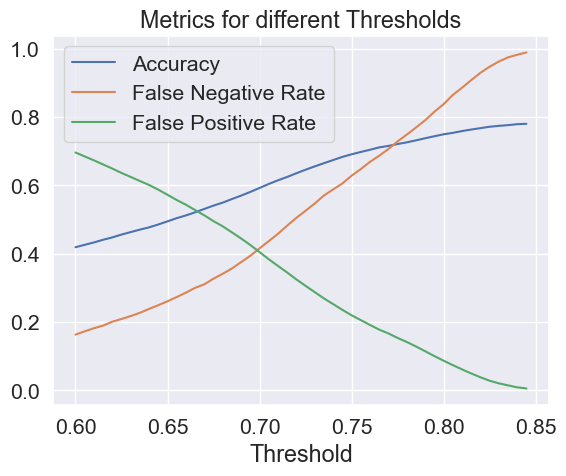

In [ ]:
#Plot for Gaussian Naive Bayes Model
MetricsPlot(accuracy_list_Gaussian)

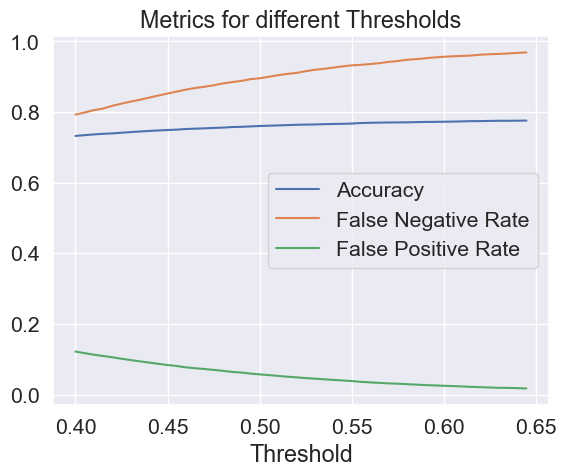

In [ ]:
#Plot for Bernoull's Naive Bayes model
MetricsPlot(accuracy_list_Bernoulli)

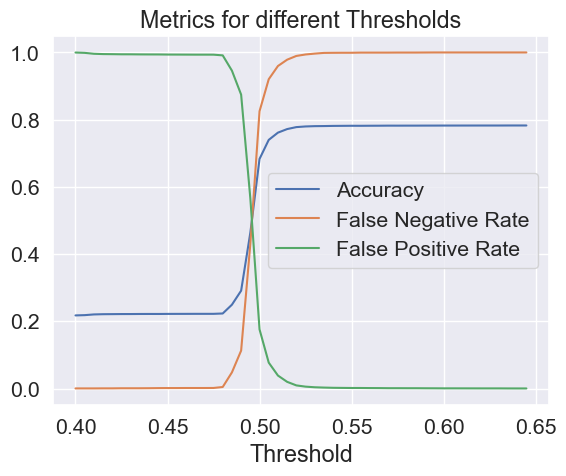

In [ ]:
#Plot for Logistic Regression Model
MetricsPlot(accuracy_list)

## **VISUALIZATION OF OUTPUT**

### **PLOTTING ROC CURVE**
**ROC Curve** - A Receiver Operator Characteristic (ROC) curve is a graphical plot used to show the diagnostic ability of binary classifiers. A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR). The true positive rate is the proportion of observations that were correctly predicted to be positive out of all positive observations (TP/(TP + FN)). Similarly, the false positive rate is the proportion of observations that are incorrectly predicted to be positive out of all negative observations (FP/(TN + FP)).


**Now through visualization, we see that the AUC obtained is 0.52, which suggests that for every True Positive Output it is likely that the model would also output False Postive Output**.

**The model is rather guessing the classes. The model is unable to distinguish between positive and negative classes.**

In [ ]:
# calculate the fpr and tpr for all thresholds of the classification
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix

def plot_ROC_curve(Y,preds):
  fpr, tpr, threshold = metrics.roc_curve(Y,preds)
  roc_auc = metrics.auc(fpr, tpr)
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()


#### **ROC Curve for Logistic Regression Model**

**The `AUC` obtainefd for Logistic Regression Model was `0.5` which is a bad score. The model is basically guessing it like a coin toss rather than predicting the output.**

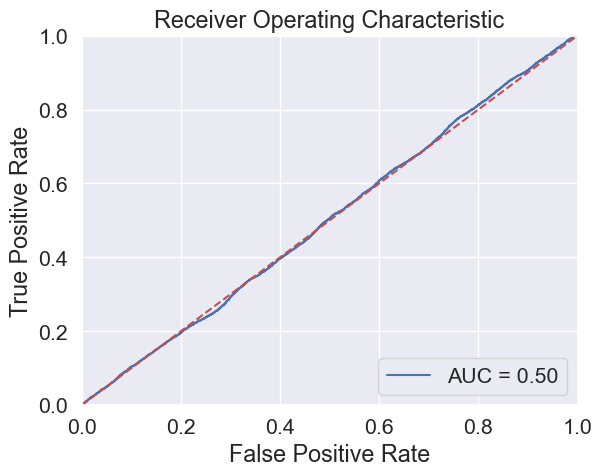

In [ ]:
y_pred_LR = LR_classifier.predict_proba(X_test)[:,1]
plot_ROC_curve(y_test,y_pred_LR)

#### **ROC Curve for Gaussian Naive Bayes Model**

**The `AUC` obtained for Gaussian Naive Bayes is `0.62`, which is much better than Logistic Regression.**

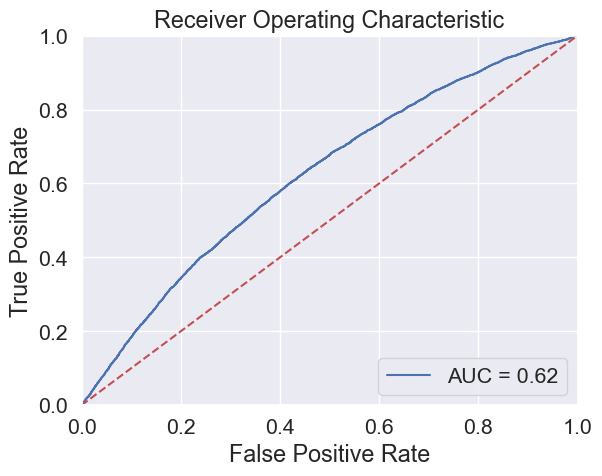

In [ ]:
y_pred_G = G_classifier.predict_proba(X_test)[:,1]
plot_ROC_curve(y_test,y_pred_G)

In [ ]:
y_pred_G.mean()

0.6584491932849965

In [ ]:
y_pred_LR

array([0.50815326, 0.49465218, 0.50922615, ..., 0.49957686, 0.49922843,
       0.4942109 ])

## **FINAL PREDICTION**

### **LOGISTIC REGRESSION**
**Final prediction using 'Logistic Regression'**

In [ ]:
predictions_LR = model_thresholding(X_final,0.485,LR_classifier)

In [ ]:
print(predictions_LR)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

### **GAUSSI**
**Final prediction using 'GaussianNB'**

In [ ]:
predictions = model_thresholding(X_final,0.704,G_classifier)

In [ ]:
print(predictions)

[0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 